# TOPIC Understanding Pooling and Padding in CNN

### ANS 1

pooling is the process of scalling down the image dimension of input image. It is mainly used for dimension reduction. There are mainly two types of pooling: 
1) min pooling 
2) max pooling

### ANS 2

difference between min and max:
1) min select the minimum value in particular image matrix and max select the maximum value in particular image. 

### ANS 3

padding is the process or technique of adding zero in the input matrix such that output feature map has the same dimension as input.
1) it is used to preserve the dimensions.
2) most of the important feature is present in the middle of the image and edges information get deflected to preserve the edges information padding is also used.

### ANS 4
1) ZERO PADDING:zero-padding is adding zero around the particular image matrix.It can be used to to make the dimension of input and output feature map same
2) VALID PADDING:valid-padding is not adding zero around the image matrix.valid-padding is used for the dimension reduction of input image matrix to generate lesser dimension output.


# Exploring LeNet

### ANS 1

LeNet-5 is a convulation neural network for handwritten character recognition.Le-net 5 consist of 7 layer:
1) Convulation layer 
2) Average pooling 
3) Convulation layer 
4) Average pooling 
5) Convulation 
6) f6 layer 
7) output layer

### ANS 2

Key component of le-Net 5 layer are:
1) tanh activation function is used in every convulation layer. 
2) Average pooling is used instead of max-pooling it is used for down-sampling the feature map.
3) In the output layer softmax activation function is used beacause it gives proabablity of every option.
4) every conuvaltion layer has an 5*5 kerel size 
5) Every average pooling has 2 strides and 2*2 kernel size.
6) structure of lenet-5 is: Convulation->Average-pooling->Convulation->Average-pooling->Convulaiton->FC->output_layer.


### ANS 3

Advantages of Le-net5:
1) have less layer.
2) easy to implement. 
3) it is very suitable for handrwitten character.
****
Disadvantages of Le-Net5:
1) It is not suitable for other image except handwritten character.
2) It has a problem of vanishing gradient 
3) It may not be able to capture complexcity of data.

### ANS 4

In [27]:
from tensorflow import keras 
from keras.datasets import mnist 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten 
from keras.models import Sequential

In [28]:
(X_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data() 

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt 

<Axes: >

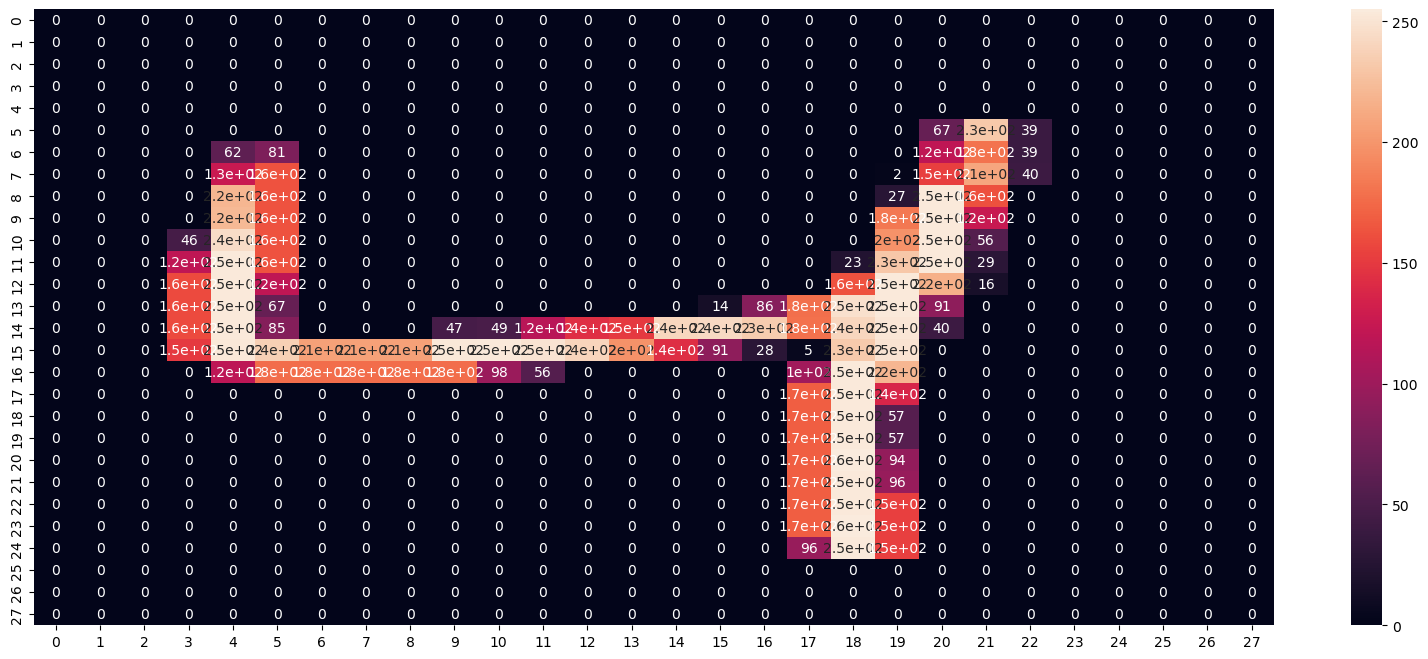

In [30]:
plt.figure(figsize=(20,8))
sns.heatmap(X_train[2],annot=True)

In [31]:
X_train=X_train/255.0
x_test=x_test/255.0

In [32]:
from keras.utils import to_categorical

In [33]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [34]:
model=Sequential()

model.add(Conv2D(6,kernel_size=(5,5),activation='tanh',padding='valid',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
          

model.add(Flatten())
          
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [35]:
model.compile(loss=keras.metrics.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=128, epochs=2, verbose=1, validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test)
print('test_loss',score[0])
print('accuracy',score[1])

Epoch 1/2


469/469 [==============================] - 8s 10ms/step - loss: 0.3477 - accuracy: 0.9018 - val_loss: 0.1510 - val_accuracy: 0.9556
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9682
test_loss 0.09828410297632217
accuracy 0.9682000279426575


# Analyzing AlexNet

### ANS 1

Alexnet is convulation neural network which is comprised of 5 convulation layer and 3 fully connected layer meaning it is model of 8 layer. 

### ANS 2

Architecutal innovation introduced in Alexnet are:
1) it uses relu activation function .
2) it is 8 layer structure. 
3) it uses max pooling for downsampling.

### ANS 3

1) Convulation layers are used to reduce the number of parameter to decrease the processing time.
2) pooling: it is used for the downsampling of the image.
3) fully_connected_layer: fully connected layer is the are of neuron where neuron train on the dataset to give accurate output.

### ANS 4

In [46]:
import numpy as np 

In [98]:
from tensorflow import keras

from keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [103]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),          
])

data_dir = "C:/Users/amand/17FlowerOxfordDataset"


oxflower_dataset = datasets.ImageFolder(root=data_dir, transform=transform)


batch_size = 32 
data_loader = DataLoader(oxflower_dataset, batch_size=batch_size, shuffle=True)


X = []
y = []


for images, labels in data_loader:
    X.extend(images)
    y.extend(labels)


X = torch.stack(X) 
y = torch.tensor(y) 


print("Shape of X:", X.shape)  
print("Shape of y:", y.shape)  


Shape of X: torch.Size([1360, 3, 224, 224])
Shape of y: torch.Size([1360])


In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [117]:
X_train=X_train/255

In [118]:
len(np.unique(X_train))

256

In [119]:
y_train=to_categorical(y_train,num_classes=17)

In [120]:
y_test=to_categorical(y_test,17)

In [125]:

model = Sequential()


model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

model.add(BatchNormalization())


model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

model.add(BatchNormalization())



model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(BatchNormalization())



model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

model.add(BatchNormalization())



model.add(Flatten())


model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(BatchNormalization())


model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(BatchNormalization())


model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 activation_34 (Activation)  (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_23 (Ba  (None, 26, 26, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_35 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 activation_35 (Activation)  (None, 26, 26, 256)     